# Linear Regression

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

## House Prediction

In [2]:
data = pd.DataFrame({'Area':[2600,3000,3200,3600,4000,4100],
                    'Bedrooms':[3,4,np.NaN,3,5,6],
                    'Age':[20,15,18,30,8,8],
                    'Price':[550000,565000,610000,595000,760000,810000]})

In [3]:
df = data.copy()

In [4]:
df

,Area,Bedrooms,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [5]:
df.columns

Index(['Area', 'Bedrooms', 'Age', 'Price'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      6 non-null      int64  
 1   Bedrooms  5 non-null      float64
 2   Age       6 non-null      int64  
 3   Price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


In [7]:
df.describe()

,Area,Bedrooms,Age,Price
count,6.000000,5.00000,6.000000,6.000000
mean,3416.666667,4.20000,16.500000,648333.333333
std,587.934237,1.30384,8.288546,109117.673484
min,2600.000000,3.00000,8.000000,550000.000000
25%,3050.000000,3.00000,9.750000,572500.000000
50%,3400.000000,4.00000,16.500000,602500.000000
75%,3900.000000,5.00000,19.500000,722500.000000
max,4100.000000,6.00000,30.000000,810000.000000


c:\Users\MICRO\Downloads\JOML\ML Model Deployment\Linear Regression\Project 0 home price prediction\mcenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\MICRO\Downloads\JOML\ML Model Deployment\Linear Regression\Project 0 home price prediction\mcenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\MICRO\Downloads\JOML\ML Model Deployment\Linear Regression\Project 0 home price prediction\mcenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtyp

<Axes: xlabel='Area', ylabel='Price'>

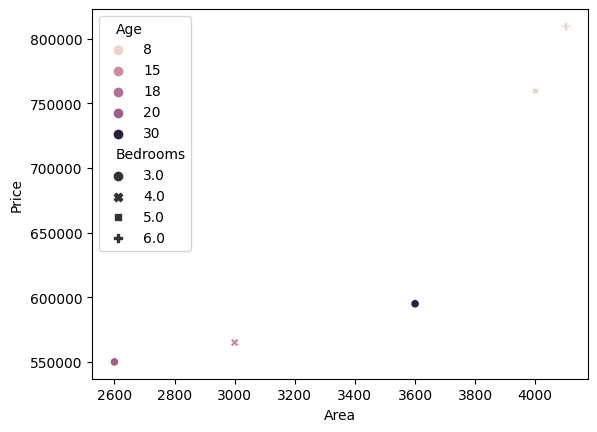

In [8]:
sns.scatterplot(data=df,x='Area',y='Price',style='Bedrooms',hue='Age')

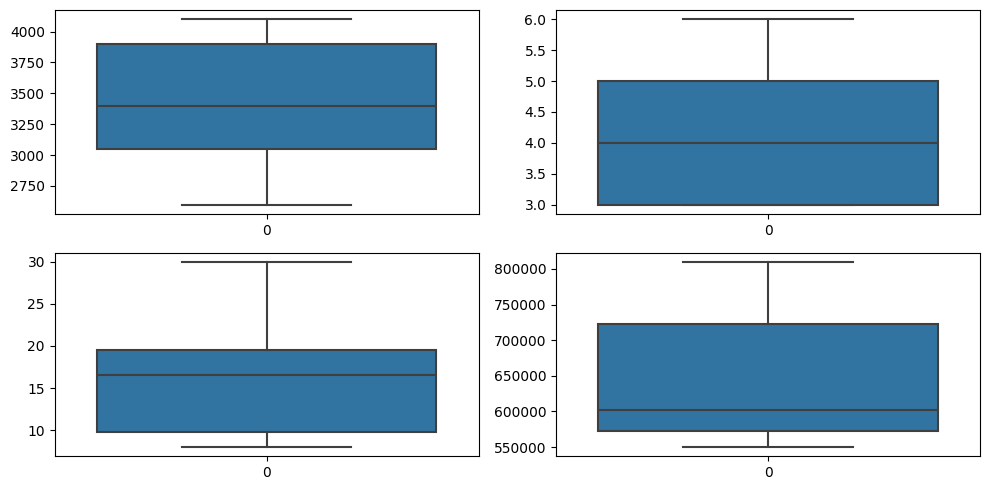

In [9]:
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(df['Area'], ax = axs[0,0])
plt2 = sns.boxplot(df['Bedrooms'], ax = axs[0,1])
plt3 = sns.boxplot(df['Age'], ax = axs[1,0])
plt1 = sns.boxplot(df['Price'], ax = axs[1,1])
plt.tight_layout()

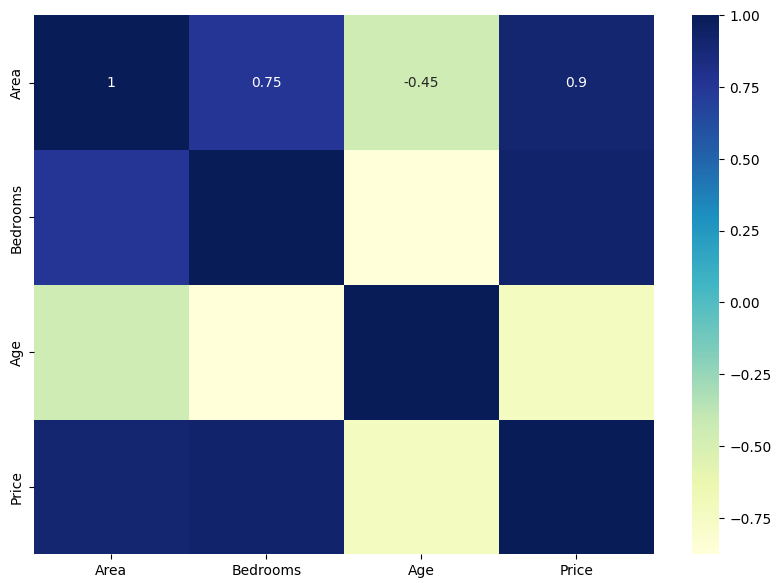

In [10]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Filling Missing value

In [11]:
mv = df['Bedrooms'].median()
df['Bedrooms'] = df['Bedrooms'].fillna(mv)

### Depedent & Independent Variables
- The independent variable is the one the experimenter controls. The dependent variable is the variable that changes in response to the independent variable.
- dependent variable that must be continuous and one or more independent variable(s) that can be any level of measurement, nominal, ordinal, interval, or ratio

In [12]:
independent = df[['Area','Bedrooms','Age']]
independent

,Area,Bedrooms,Age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [13]:
dependent = df[['Price']]
dependent


,Price
0,550000
1,565000
2,610000
3,595000
4,760000
5,810000


## Model Creation

In [14]:
X= df[['Area','Bedrooms','Age']]
y = df['Price']

X.columns = ['Area', 'Bedrooms', 'Age']

In [15]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

1. model = linear_model.LinearRegression():
- In this line, we are creating an instance of the LinearRegression class from the linear_model module.
This class represents a linear regression model, which is a type of supervised machine learning algorithm used for predicting continuous numeric values based on input features.
By calling linear_model.LinearRegression(), we are initializing a new linear regression model and assigning it to the variable model.
2. model.fit(X, y):

- In this line, we are fitting the linear regression model to our training data.
The fit() method is a common method in scikit-learn (a popular machine learning library in Python) that trains the model on the given input data.
X represents the input features or independent variables, and y represents the target variable or dependent variable.
3. The fit() method calculates the coefficients (slope and intercept) of the linear regression equation that best fits the training data, using a method called ordinary least squares.
Once the model is fitted, it can be used to make predictions on new, unseen data.

## Prediction

In [16]:
model.predict([[1000,2,18]])

c:\Users\MICRO\Downloads\JOML\ML Model Deployment\Linear Regression\Project 0 home price prediction\mcenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([321992.28160802])

In [17]:
# model exporting
import pickle
with open('pickle_model','wb') as f:
  pickle.dump(model,f)